In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn import tree
import graphviz
import seaborn as sns

2023-06-23 21:38:55.788231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 21:38:55.945111: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-23 21:38:55.945137: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-23 21:38:57.149811: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
class TrainingPlot(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('accuracy'))
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(self.losses) + 1), self.losses)
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(self.accuracies) + 1), self.accuracies)
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
        plt.show()
        
plot_losses = TrainingPlot()




In [3]:
df = pd.read_csv("braille.csv")
df

,Character,Dot 1,Dot 2,Dot 3,Dot 4,Dot 5,Dot 6
0,A,1,0,0,0,0,0
1,B,1,1,0,0,0,0
2,C,1,0,0,1,0,0
3,D,1,0,0,1,1,0
4,E,1,0,0,0,1,0
5,F,1,1,0,1,0,0
6,G,1,1,0,1,1,0
7,H,1,1,0,0,1,0
8,I,0,1,0,1,0,0
9,J,0,1,0,1,1,0


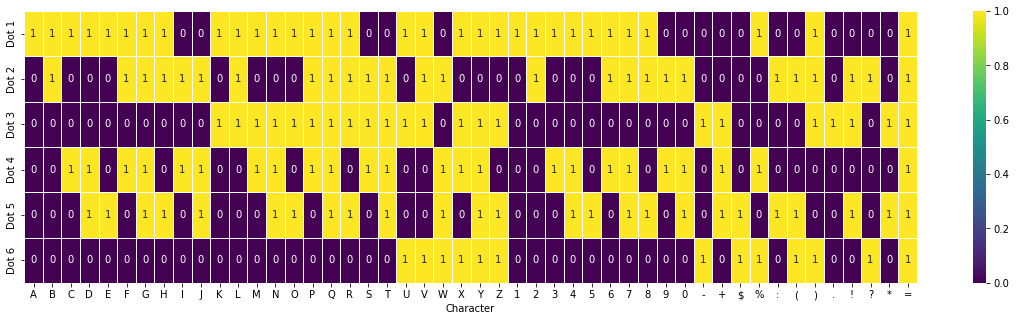

In [4]:
plot_csv = df.set_index('Character').T

# Criação do heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(plot_csv, cmap="viridis", annot=True, linewidths=.5)

plt.show()

In [47]:
plot_csv

Character,A,B,C,D,E,F,G,H,I,J,...,$,%,:,(,),.,!,?,*,=
Dot 1,1,1,1,1,1,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
Dot 2,0,1,0,0,0,1,1,1,1,1,...,0,0,1,1,1,0,1,1,0,1
Dot 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,1
Dot 4,0,0,1,1,0,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
Dot 5,0,0,0,1,1,0,1,1,0,1,...,1,0,1,1,0,0,1,0,1,1
Dot 6,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,1,0,1


In [5]:
target = np.eye(df.shape[0])

In [6]:
target[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
X = pd.DataFrame()
X[0] = df["Dot 1"]
X[1] = df["Dot 2"]
X[2] = df["Dot 3"]
X[3] = df["Dot 4"]
X[4] = df["Dot 5"]
X[5] = df["Dot 6"]

In [45]:
model = keras.Sequential()
model.add(keras.layers.Dense(6, input_shape=(6, ), activation=keras.activations.sigmoid, use_bias=True))
model.add(keras.layers.Dense(48, activation=keras.activations.softmax))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(0.01))


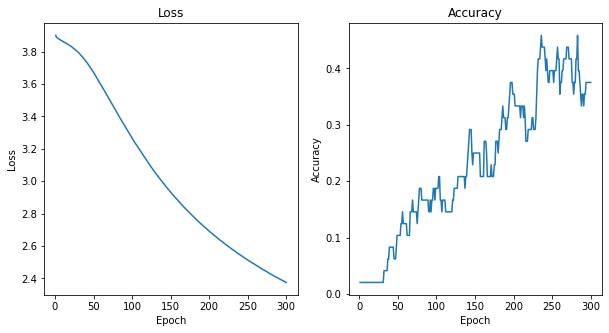

2/2 [==============================] - 0s 4ms/step - loss: 2.3725 - accuracy: 0.4167


[2.3725392818450928, 0.4166666567325592]

In [46]:
history = model.fit(
    X,
    target,
    epochs=300,
    verbose=1,
    shuffle=True,
    callbacks=[plot_losses]
)

model.evaluate(X, target)

In [11]:
predict_a = model.predict(X[0:1])

1/1 [==============================] - 0s 72ms/step


In [12]:
predict_a.argmax()

38

In [13]:
predict_a[0][predict_a.argmax()]

0.027289322

In [14]:
predict_a[0]

array([0.02136054, 0.02020654, 0.02230108, 0.02324822, 0.02588864,
       0.01713136, 0.01778782, 0.02070416, 0.01258135, 0.01748764,
       0.02295513, 0.0222605 , 0.0186195 , 0.02102172, 0.02359994,
       0.01516133, 0.01975832, 0.02529611, 0.01402511, 0.01879577,
       0.02085006, 0.02041169, 0.01872623, 0.02326054, 0.02301158,
       0.0244188 , 0.02390493, 0.0212342 , 0.01860764, 0.02386843,
       0.0254169 , 0.01609388, 0.01758279, 0.02644442, 0.01399883,
       0.01869214, 0.02220283, 0.0223997 , 0.02728932, 0.01731549,
       0.02072103, 0.02245058, 0.0218853 , 0.02382373, 0.02145104,
       0.01817063, 0.02370157, 0.02187491], dtype=float32)

In [15]:
predict_z = model.predict(X[25:26])

1/1 [==============================] - 0s 20ms/step


In [16]:
model.save("braille.h5")

In [17]:
predict_z.argmax()

38

In [18]:
predict_z[0][predict_z.argmax()]

0.028915884

In [19]:
model_tree = tree.DecisionTreeClassifier()


In [32]:
model_tree.fit(X, target)

DecisionTreeClassifier()

In [33]:
# Export the decision tree as a Graphviz object
dot_data = tree.export_graphviz(model_tree, out_file=None,
                                class_names=df["Character"].values,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

In [ ]:
# Calcular a pontuação de precisão do modelo nos dados de teste
print("score:", model_tree.score(X, target))

score: 0.5416666666666666
